## Lab EDA Univariate

In [ ]:

import numpy as np
import pandas as pd


# make sure all columns are displayed
pd.set_option('display.max_columns', None)

# import dtaset
data = pd.read_csv("amz_uk_price_prediction_dataset.csv")
df = data.copy()


#### Initial Exploration

In [8]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [7]:
df.shape

(2443651, 9)

#### Numerical and Categorical

In [9]:
num = df.select_dtypes(include="number")
cat = df.select_dtypes(exclude="number")

In [10]:
num

,uid,stars,reviews,price,boughtInLastMonth
0,1,4.7,15308,21.99,0
1,2,4.7,98099,23.99,0
2,3,4.7,15308,21.99,0
3,4,4.7,7205,31.99,0
4,5,4.6,1881,17.99,0
...,...,...,...,...,...
2443646,2828589,0.0,0,22.34,0
2443647,2828590,0.0,0,97.99,0
2443648,2828591,0.0,0,52.99,0
2443649,2828592,4.3,404,79.99,0


In [11]:
cat

,asin,title,isBestSeller,category
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",False,Hi-Fi Speakers
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",True,Hi-Fi Speakers
2,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",False,Hi-Fi Speakers
3,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",False,Hi-Fi Speakers
4,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,False,Hi-Fi Speakers
...,...,...,...,...
2443646,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",False,Motorbike Clothing
2443647,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,False,Motorbike Clothing
2443648,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,False,Motorbike Clothing
2443649,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,False,Motorbike Clothing


In [16]:
cat_from_num = num.loc[:, num.nunique() < 50]
cat_from_num

,stars,boughtInLastMonth
0,4.7,0
1,4.7,0
2,4.7,0
3,4.7,0
4,4.6,0
...,...,...
2443646,0.0,0
2443647,0.0,0
2443648,0.0,0
2443649,4.3,0


#### Data Cleaning

In [ ]:
# check for Nulls
df.isna().sum()
# ---> No cleaning needed

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [ ]:
# check for duplicates
df.duplicated().sum()
# ---> No cleaning needed

0

In [ ]:
# check for empty spaces
df.eq(" ").sum()
# ---> No cleaning needed

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

### Part 1: Understanding Product Categories

#### Univariate Analysis

In [ ]:

# frequency table
frequency_table = cat["category"].value_counts()
frequency_table

Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: category, Length: 296, dtype: int64

In [26]:
# top 5 categories
top_five = frequency_table[:5]
top_five

Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: category, dtype: int64

#### Visualizations

<AxesSubplot: >

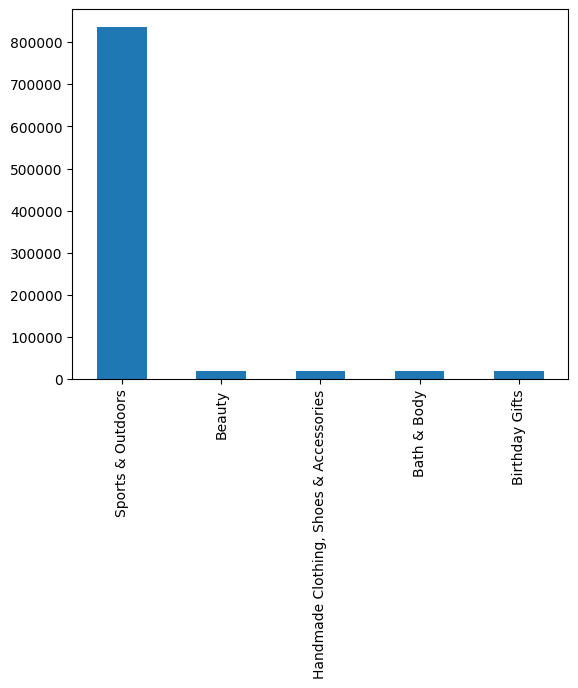

In [32]:
import matplotlib.pyplot as plt

top_five.plot.bar()


<AxesSubplot: ylabel='category'>

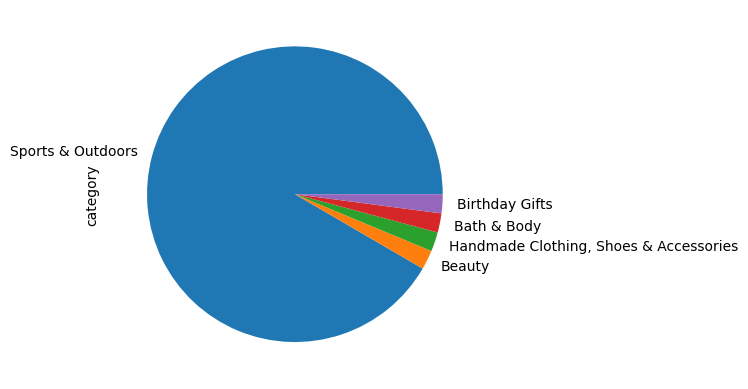

In [33]:
top_five.plot.pie()

### Part 2: Delving into Product Pricing

#### Measures of Centrality

In [ ]:
# mean of the price column
mean_price = df["price"].mean()
mean_price

89.24380943923663

In [ ]:
# median of the price column
median_price = df["price"].median()
median_price

19.09

In [ ]:
# mode of the price column
mode_price = df["price"].mode()
mode_price

0    9.99
Name: price, dtype: float64

#### Measures of Dispersion

In [ ]:
# variance of the price column
variance_price = df["price"].var()
variance_price

119445.48532254907

In [44]:
# standard deviation of the price column
std_price = df["price"].std()
std_price

345.60886175349884

In [53]:
# range of the price column
min_price = df["price"].min()
print("min =", min_price)

max_price = df["price"].max()
print("max =", max_price)

range =  max_price - min_price
range



min = 0.0
max = 100000.0


100000.0

In [56]:
# Interquartile Range
Q1 = df["price"].quantile(0.25)  # 25th percentile
Q3 = df["price"].quantile(0.75)  # 75th percentile

IQR = Q3 - Q1
IQR

36.0

In [ ]:
# The prices are extremely varied. We can see this in the high rnge and also the stndard deviation compared to the mean.

#### Visualization

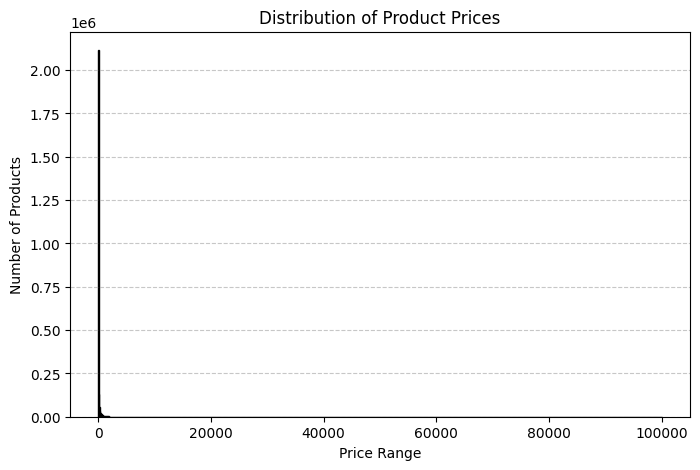

In [60]:

plt.figure(figsize=(8,5))  # Adjust figure size for better readability
plt.hist(df["price"], bins=1000, color='skyblue', edgecolor='black')  # Adjust bins for clarity

# Labels and Title
plt.xlabel("Price Range")
plt.ylabel("Number of Products")
plt.title("Distribution of Product Prices")

# Show Grid for Better Readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the Plot
plt.show()

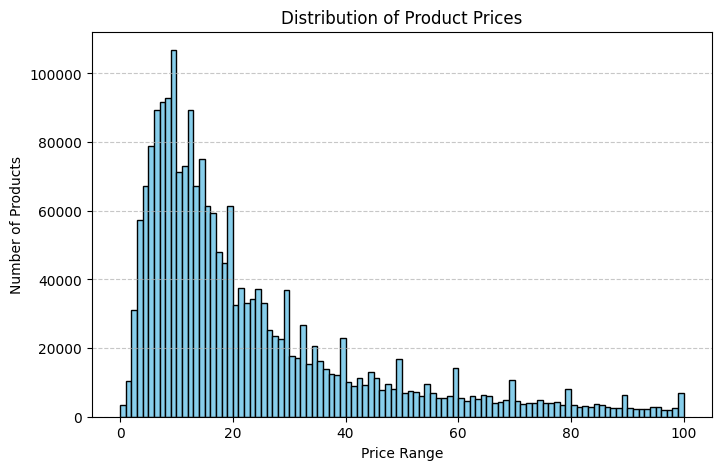

In [66]:
# Its extremely hard to read due to the outliers
# Solution: don't take outliers into consideration by using the interquartile range


# Define Lower and Upper Bound for Outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Remove Outliers
df_filtered = df[(df["price"] >= lower_bound) & (df["price"] <= upper_bound)]

plt.figure(figsize=(8,5))  # Adjust figure size for better readability
plt.hist(df_filtered["price"], bins=100, color='skyblue', edgecolor='black')  # Adjust bins for clarity

# Labels and Title
plt.xlabel("Price Range")
plt.ylabel("Number of Products")
plt.title("Distribution of Product Prices")

# Show Grid for Better Readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the Plot
plt.show()

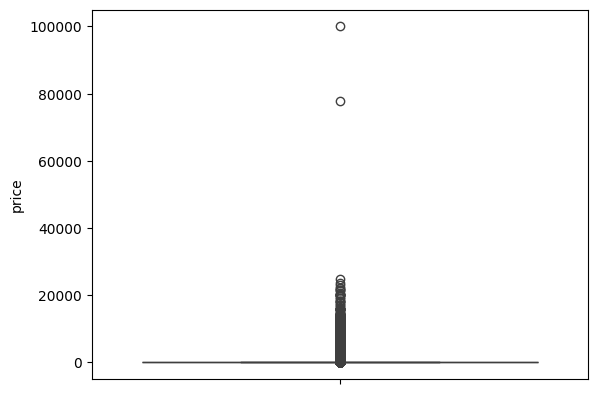

In [68]:
# box plot
import seaborn as sns

sns.boxplot(data=num.price)
plt.show()

### Part 3: Unpacking Product Ratings

#### Measures of Centrality

In [71]:
# mean of the rating column
mean_rating = df["stars"].mean()
mean_rating

2.152836472966065

In [ ]:
# median of the rating column
median_rating = df["stars"].median()
median_rating

0.0

In [ ]:
# mode of the rating column
mode_rating = df["stars"].mode()
mode_rating

# many products seem to be not rated at all

0    0.0
Name: stars, dtype: float64

In [ ]:
# variance of the rating column
variance_rating = df["stars"].var()
variance_rating

4.817434029796862

In [ ]:
# standard of the rating column
std_rating = df["stars"].std()
std_rating

2.1948653785134207

In [ ]:
# Interquartile Range of rating
Q1 = df["stars"].quantile(0.25)  # 25th percentile
Q3 = df["stars"].quantile(0.75)  # 75th percentile

IQR = Q3 - Q1
IQR


4.4

In [ ]:
# there seems to be a high range of ratings

In [79]:
from scipy.stats import skew

skewness_value = skew(df["stars"])
skewness_value

0.08120730776283354

In [80]:
from scipy.stats import kurtosis
kurtosis_value = kurtosis(df["stars"])
kurtosis_value

-1.926004642549839

In [ ]:
# negative kurtosis -> is this correct?

#### Visualization

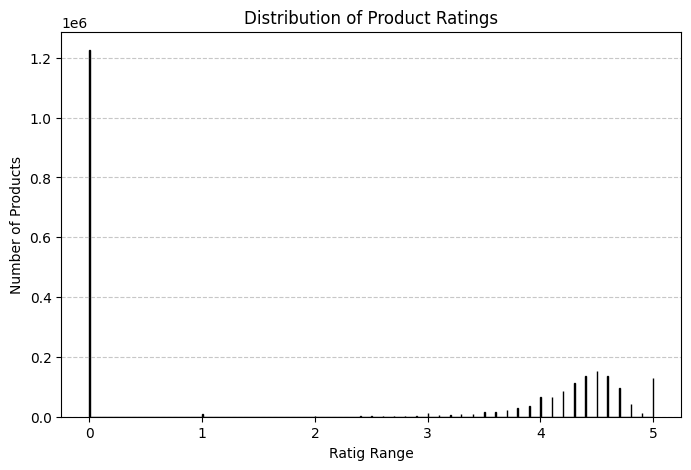

In [81]:
plt.figure(figsize=(8,5))  # Adjust figure size for better readability
plt.hist(df["stars"], bins=1000, color='skyblue', edgecolor='black')  # Adjust bins for clarity

# Labels and Title
plt.xlabel("Ratig Range")
plt.ylabel("Number of Products")
plt.title("Distribution of Product Ratings")

# Show Grid for Better Readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the Plot
plt.show()

In [ ]:
# unrated is most comon, followed by 4.5